# Variasi Jendela

## Fungsi jendela
Untuk sinyal analog atau sinyal diskrit yang tak terbatas dalam waktu dengan bentuk sinusoidal, spektrumnya adalah delta function pada frekuensi sinyal tersebut. Namun, dalam praktiknya, spektrum sinyal harmonik yang dibatasi waktu nyata setara dengan sebuah fungsi

$$\frac{sin(x)}{x} - sinc(x)$$

Lebar lobe utama dalam domain frekuensi dari transformasi Fourier dari sinyal tergantung pada durasi interval analisis sinyal T. Pembatasan waktu ini sebenarnya adalah perkalian sinyal dengan envelop persegi, atau "rectangular window".

Perkalian sinyal dalam domain waktu setara dengan konvolusi spektrum mereka dalam domain frekuensi (dan sebaliknya: konvolusi sinyal dalam domain waktu setara dengan perkalian spektrum mereka dalam domain frekuensi). Oleh karena itu, spektrum dari sinyal harmonik yang dibatasi oleh envelope persegi setara dengan ~ $sinc(x)$. Ini juga terkait dengan fakta bahwa kita tidak dapat mengintegrasikan sinyal selama interval waktu yang tak terbatas, dan transformasi Fourier dalam bentuk diskrit, yang diungkapkan melalui jumlah terbatas, dibatasi oleh jumlah sampel.

Biasanya, panjang FFT (Transformasi Fourier Cepat) dalam perangkat pemrosesan sinyal digital modern mengambil nilai $N_{FFT}$ dari 8 hingga beberapa juta titik. Dengan membatasi sinyal pada interval N, kita efektif menerapkan "jendela" berbentuk persegi panjang dengan durasi N sampel. Oleh karena itu, spektrum yang dihasilkan adalah spektrum dari sinyal harmonik yang dikalikan dengan envelope persegi panjang.

Mari kita lanjutkan dengan contoh. Kita akan membangun spektrum dari sinyal harmonik pendek dengan parameter berikut: panjang sinyal $N = 256$, panjang FFT $N_{FFT} = 2048$. Untuk memperjelas, kita akan mempresentasikan grafik spektrum dalam skala logaritmik.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift
import scipy.signal as sig

FONT_SMALL = 12
FONT_MEDIUM = 14

plt.rc('axes', titlesize=FONT_MEDIUM) 
plt.rc('axes', labelsize=FONT_SMALL)
plt.rc('xtick', labelsize=FONT_SMALL)
plt.rc('ytick', labelsize=FONT_SMALL) 
plt.rc('legend', fontsize=FONT_MEDIUM) 
plt.rc('figure', titlesize=FONT_MEDIUM)

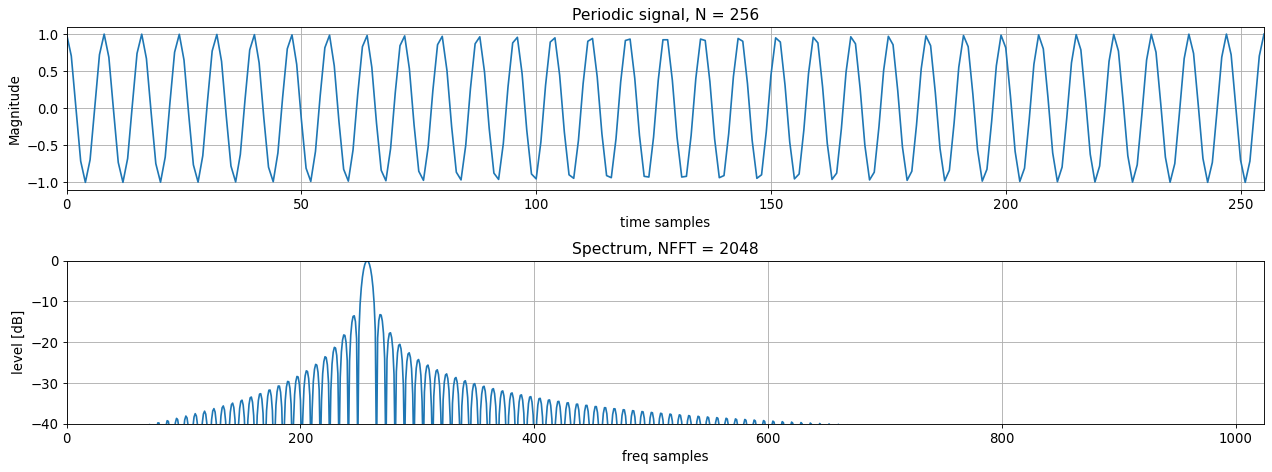

In [3]:
# Input parameters
N = 256
NFFT = 2048

# Input signal (long: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = np.cos(2*np.pi*32*tt)

# Calculate FFT
sft = np.abs(fft(xx, NFFT))
slg = 20*np.log10(sft / np.max(sft))

plt.figure(figsize=(16, 6), dpi=80)
plt.subplot(2,1,1)
plt.title('Periodic signal, N = {}'.format(N))
plt.xlabel('time samples')
plt.ylabel('Magnitude')
plt.plot(xx)
plt.xlim([0, N-1])
plt.grid(True)

plt.subplot(2,1,2)
plt.title('Spectrum, NFFT = {}'.format(NFFT))
plt.xlabel('freq samples')
plt.ylabel('level [dB]')
plt.plot(slg)
plt.xlim([0, NFFT//2])
plt.ylim([-40, 0])
plt.grid(True)
plt.tight_layout()

Seperti yang terlihat, spektrum dari sinyal harmonik pendek dalam kehidupan nyata tidak setara dengan delta function, melainkan menyerupai konvolusi dari spektrum sinyal persegi dan sinyal harmonik. Pada grafik, hanya ditampilkan setengah domain frekuensi. Sinyal akhirnya bersifat simetris terhadap setengah frekuensi sampling atau parameter $\frac{N_{FFT}}{2}$.

Ingatlah bahwa spektrum sinyal persegi setara dengan ekspresi ~ $\frac{sin(x)}{x} = sinc(x)$. Artinya, pada frekuensi sinyal, spektrum sinyal persegi seolah-olah "tersusun" di atas delta function. Ketika durasi sinyal harmonik diperbesar dalam domain waktu, spektrumnya cenderung menjadi delta function pada frekuensi sinyal tersebut, sementara pengaruh jendela persegi berkurang.

Jadi, membatasi sinyal dalam waktu mengakibatkan penerapan "jendela" berbentuk persegi panjang. Pada contoh di bawah ini, durasi sinyal secara signifikan diperbesar ($N = 65536$). Seperti yang terlihat, spektrum sinyal semacam itu cenderung menjadi delta function?

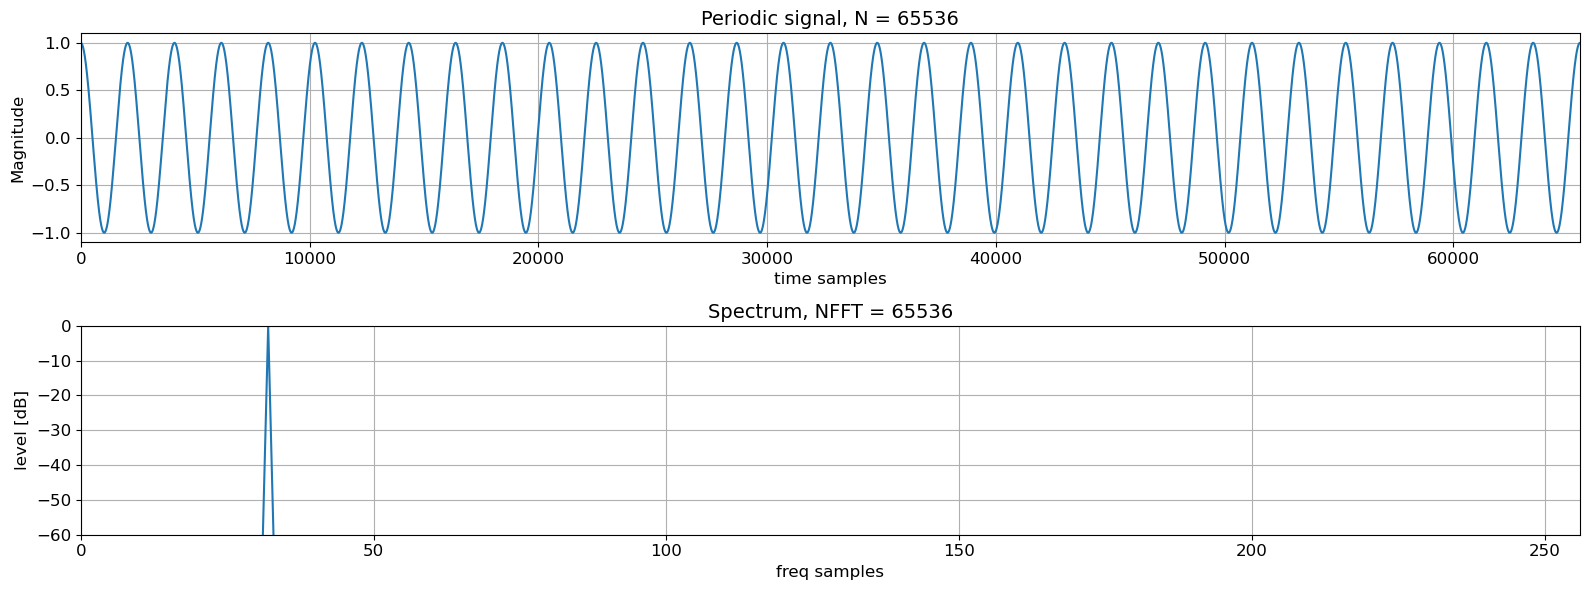

In [23]:
# Input parameters
N = 65536

# Input signal (long: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = np.cos(2*np.pi*32*tt)

# Calculate FFT
sft = np.abs(fft(xx, N))
slg = 20*np.log10(sft / np.max(sft))

plt.figure(figsize=(16, 6))
plt.subplot(2,1,1)
plt.title('Periodic signal, N = {}'.format(N))
plt.xlabel('time samples')
plt.ylabel('Magnitude')
plt.plot(xx)
plt.xlim([0, N-1])
plt.grid(True)

plt.subplot(2,1,2)
plt.title('Spectrum, NFFT = {}'.format(N))
plt.xlabel('freq samples')
plt.ylabel('level [dB]')
plt.plot(slg)
plt.xlim([0, N//256])
plt.ylim([-60, 0])
plt.grid(True)
plt.tight_layout()

Sayangnya, dalam kehidupan nyata dan dalam praktiknya, penggunaan sinyal yang tak terbatas - tidak mungkin dan membutuhkan banyak waktu:

- Sinyal yang sangat panjang memerlukan ruang penyimpanan yang besar untuk menyimpan nilai-nilai.
- Sinyal yang panjang mengandung lebih banyak energi daripada sinyal pendek dengan kondisi yang sama, yang pada gilirannya membuat sulit untuk mentransmisikan dan menerima sinyal-sinyal tersebut.
- Sinyal-sinyal yang panjang memerlukan lebih banyak sumber daya komputasi untuk pengolahannya (konvolusi, filtrasi, transformasi Fourier).
- Pulsa-pulsa yang panjang lebih rentan terhadap distorsi daripada yang pendek karena penyebaran yang lebih lama dalam medium fisik.

Ketika sinyal dikalikan dengan jendela persegi (memotong urutan panjang menjadi sinyal yang sebenarnya), terjadi efek "penyebaran spektrum" atau "penyemprotan" spektrum. Masalah utama dengan penyemprotan spektrum terkait dengan fakta bahwa puncak-puncak sinyal yang lebih kuat dapat menyembunyikan sinyal-sinyal yang lemah. Di bawah ini akan diperlihatkan bagaimana penggunaan fungsi jendela dapat mengurangi dampak penyemprotan spektrum.

### Fungsi Jendela


Dalam masalah pemrosesan sinyal digital, berbagai macam jendela telah dikembangkan untuk digunakan pada sinyal dalam domain waktu, yang secara kualitatif meningkatkan karakteristik spektralnya. Banyaknya jenis jendela ini terutama disebabkan oleh salah satu fitur utama dari setiap aplikasi jendela. Fitur ini terutama termanifestasi dalam hubungan antara tingkat penekanan lobus samping dan lebar lobus utama.

Aturan: semakin besar penekanan lobus samping spektrum, semakin lebar lobus utama spektrum, dan sebaliknya.

Bayangkan sinyal yang dibagi menjadi beberapa urutan yang masing-masing diolah secara independen, dan kemudian digabungkan menjadi satu sinyal. Saat melakukan FFT, jendela persegi diterapkan. Oleh karena itu, pemulihan bentuk sinyal dapat menghasilkan efek yang tidak diinginkan, yang diekspresikan dalam distorsi bentuk sinyal di persimpangan (lonjakan sinyal). Untuk meratakan lonjakan ini, filtrasi jendela dapat diterapkan.

Salah satu aplikasi fungsi jendela adalah mendeteksi sinyal lemah di antara sinyal yang lebih kuat dengan menekan tingkat lobus samping. Fungsi jendela utama dalam masalah pemrosesan sinyal digital meliputi: segitiga, sinusoidal, Lanczos, Hann, Hamming, Blackman, Harris, Blackman-Harris, jendela dengan puncak datar, jendela Nuttall, Gauss, Kaiser, dan banyak lainnya. Sebagian besar dari mereka diungkapkan melalui deretan hingga dengan menggabungkan sinyal harmonik dengan koefisien bobot tertentu. Sinyal-sinyal ini dapat diimplementasikan dengan baik pada perangkat keras apa pun (circuit logic programmable atau prosesor sinyal).

Fungsi jendela yang memiliki bentuk kompleks dihitung dengan mengambil eksponensial (jendela Gauss) atau fungsi Bessel yang dimodifikasi (jendela Kaiser). Fungsi jendela semacam ini lebih sulit diimplementasikan dalam sirkuit terpadu (untuk menghitung fungsi eksponensial atau fungsi Bessel memerlukan tabel enkode satu nilai ke nilai lain).

### Koefisien Penekanan

Nyata bahwa ketika sinyal dikalikan dengan fungsi jendela, amplitudo osilasi hasilnya berubah. Dalam masalah pengolahan sinyal digital, diperkenalkan konsep koefisien penekanan, yang menggambarkan penekanan sinyal selama proses filtrasi jendela dibandingkan dengan menggunakan jendela persegi. Formula untuk menghitung koefisien penekanan:

$$\beta = \frac{A_{w}}{A_r} . \frac{1}{N} \sum\limits_{n=0}^{N-1} w(n)$$

Dimana:

- $A_{w}$ : level dari kontribusi konstan dari fungsi jendela,
- $A_r$ : level dari kontribusi konstan dari jendela persegi,
- $w(n)$ : sampel dari fungsi jendela,
- $N$ : panjang fungsi jendela.

Dengan menggunakan python, mari kita definisikan fungsi yang akan menampilkan fungsi jendela:|endela:

In [7]:
def dft_win(w):
    """
    Plot window function and spectrum of the window
    
    Parameters
    ----------
    w : np.array
        input window vector
    """
    
    # Find length of window
    N = len(w)
    # FFT size
    NFFT = 2**12
    # Calculate FFT
    W = fftshift(fft(w, NFFT))
    # Find max and add minimum floating-point value (except divide-by-zero)
    W = W / np.amax(W) + np.nextafter(0,1)
    tt = np.linspace(-1, 1, NFFT)

    # plot window function and its spectrum
    fig = plt.figure(figsize=(16, 6))
    
    plt.subplot(2,1,1)
    plt.stem(w, basefmt='C0')
    plt.title('Window fucntion')
    plt.xlabel('Samples')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(2,1,2)
    plt.plot(tt, 20*np.log10(np.abs(W)))
    plt.title('Spectrum')
    plt.xlabel('Frequency')
    plt.ylabel('Level in dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()

### Fungsi Jendela Utama

Berikut adalah ekspresi untuk fungsi jendela utama. Durasi dari fungsi jendela adalah $N$, $w(n)$ adalah sampel dari fungsi jendela. Di dalam pustaka scipy dari Python, semua jendela yang umum digunakan tersedia di dalam paket sinyal. Cara untuk memanggilnya cukup sederhana. Selanjutnya, dalam bentuk tabel dan grafik, akan ditunjukkan efektivitas relatif dari berbagai jendela.

Aturan: jumlah dari modulus koefisien fungsi jendela sama dengan satu!tu!

## Jendela Persegi

$$w(n) = 1$$


Jendela paling sederhana, memiliki karakteristik terburuk dan secara otomatis dihasilkan saat mereduksi rangkaian menjadi N sampel. Tingkat maksimum dari sisi gelombang (SBG) karakteristik frekuensi jendela persegi adalah -13 dB.

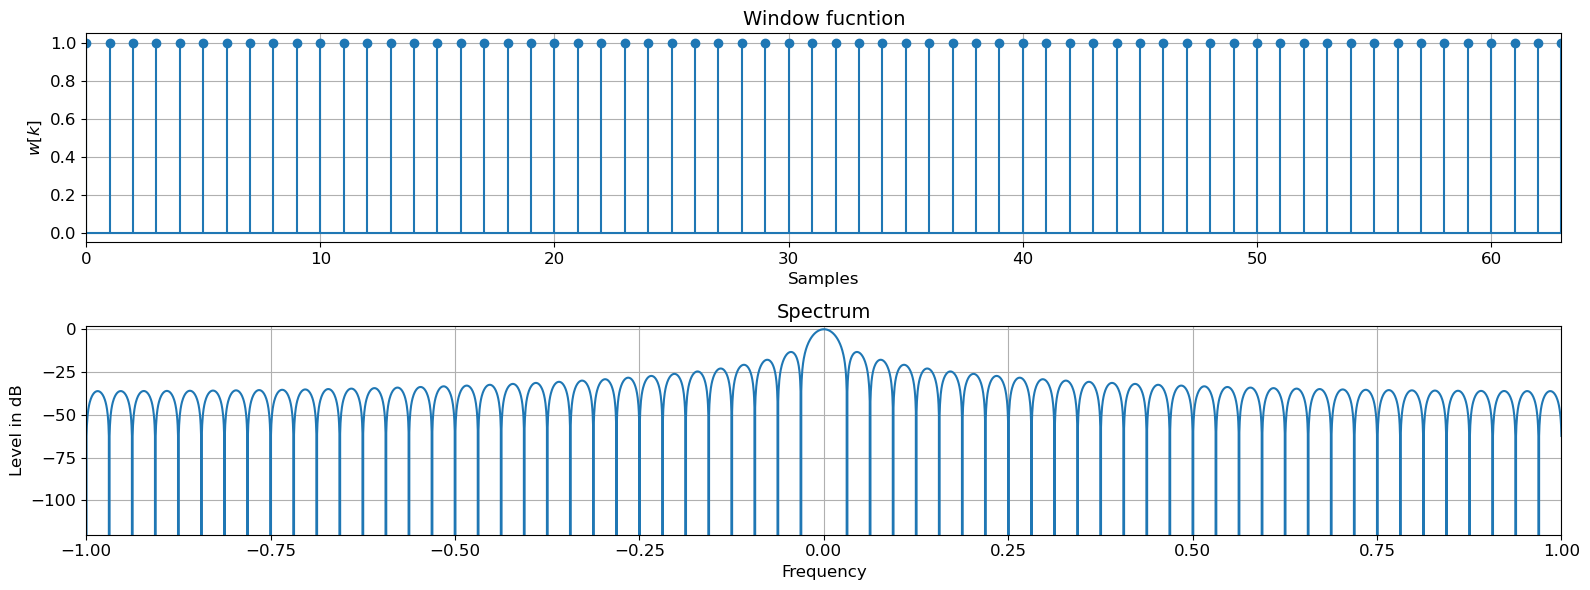

In [8]:
N = 64
dft_win(np.ones(N))

## Jendela Segitiga

Juga dikenal sebagai jendela Bartlett.

$$w(n) = 1 - \frac{n - N/2}{L/2}$$

Dimana $L = N, N+1, N+2$

Maksimum Tingkat Sisi Gelombang: -26 dt(M)

C:\Users\Arthur\AppData\Local\Temp\ipykernel_11768\1913324312.py:2: DeprecationWarning: Importing triang from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.triang' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.triang(N))


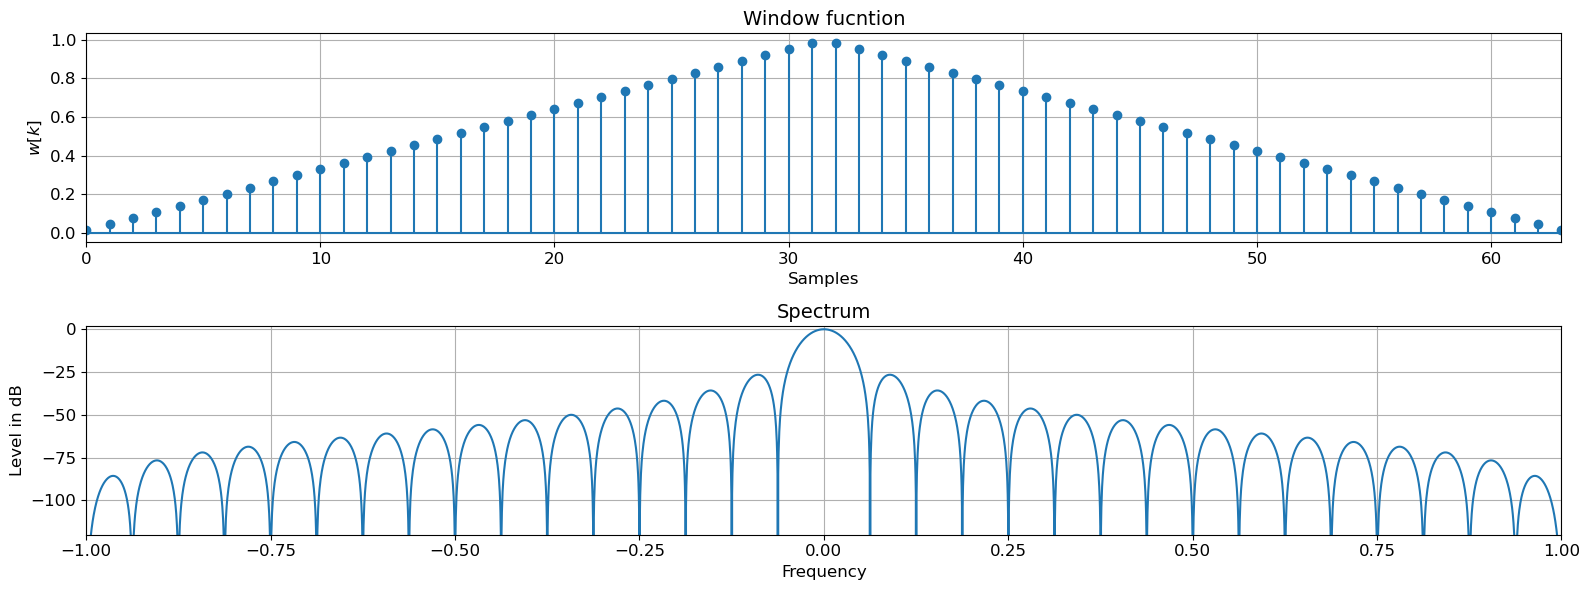

In [15]:
N = 64
dft_win(sig.triang(N))

## Jendela Sinusoidal

$$w(n) = sin(\frac{\pi  .n}{N - 1})$$

M
Mudah dalam hal implementasi perangkat lunak dan keras. Tingkat maksimum sisi gelombang dari jendela sinusoidal adalah -23 d

C:\Users\Arthur\AppData\Local\Temp\ipykernel_11768\2194007817.py:2: DeprecationWarning: Importing cosine from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.cosine' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.cosine(N))


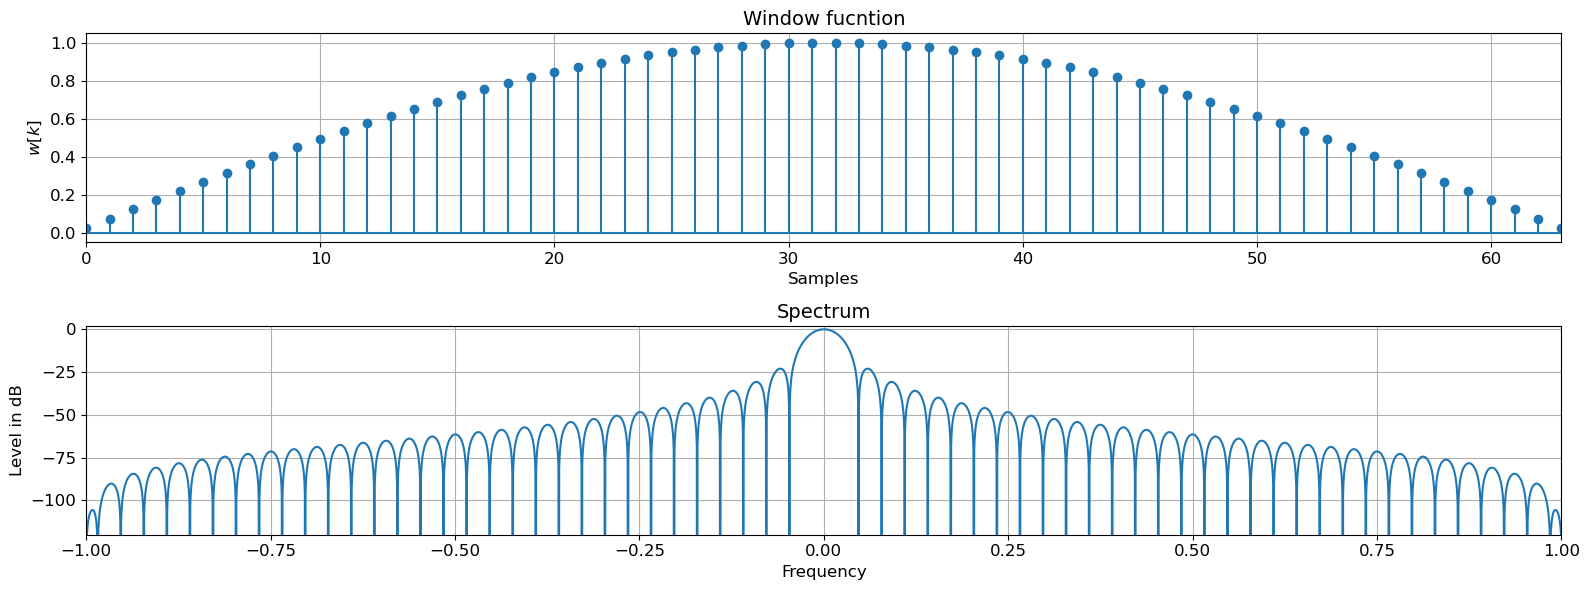

In [16]:
N = 64
dft_win(sig.cosine(N))

## Jendela Hann (atau Hanning)

$$w(n) = 0.5 . [1 - cos(\frac{2 \pi n}{N - 1})]$$

Jendela Hann (atau Hanning), juga dikenal sebagai jendela Blackman-Harris orde kedua. 
Maksimum Tingkat Sisi Gelombang: -31,5 dB.

C:\Users\Arthur\AppData\Local\Temp\ipykernel_11768\3344864513.py:2: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.hann(N))


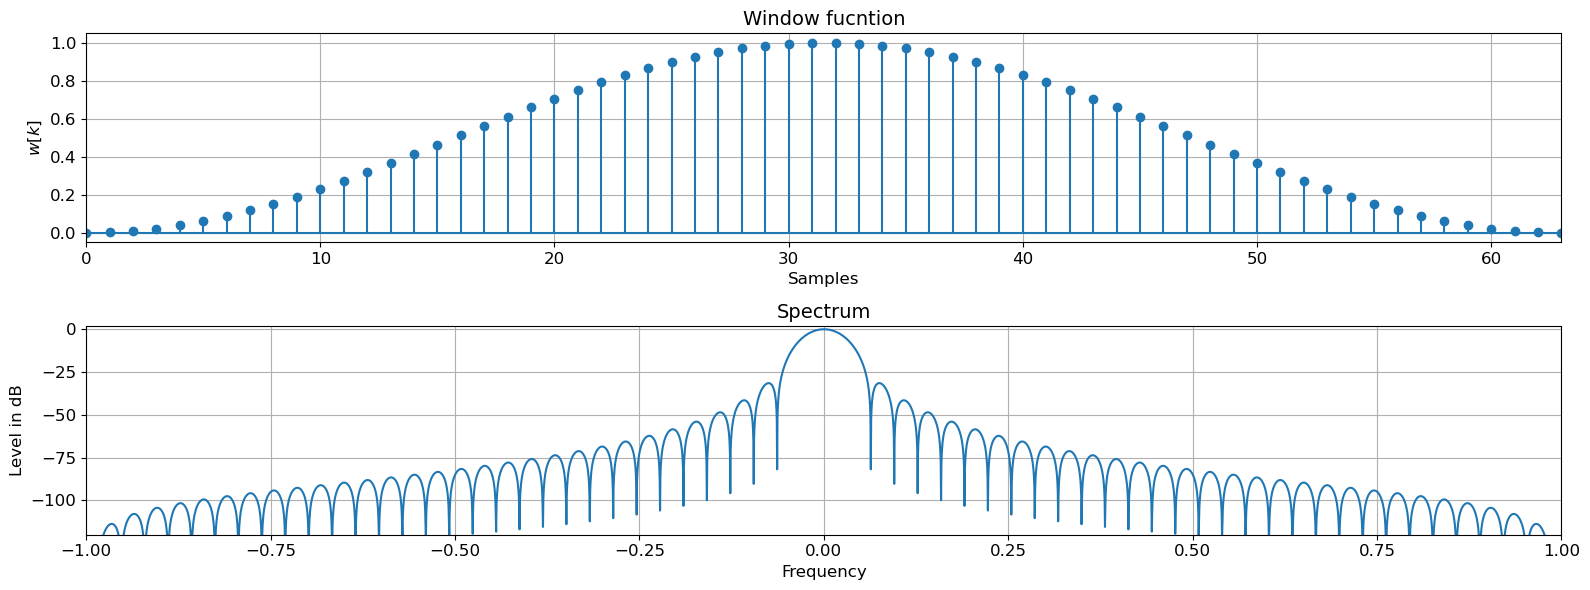

In [17]:
N = 64
dft_win(sig.hann(N))

## Jendela Hamming

$$w(n) = 0.53836 - 0.46164 . cos(\frac{2 \pi n}{N - 1})$$

Maksimum Tingkat Sisi Gelombang: -42 dB.

C:\Users\Arthur\AppData\Local\Temp\ipykernel_11768\1891102783.py:2: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.hamming(N))


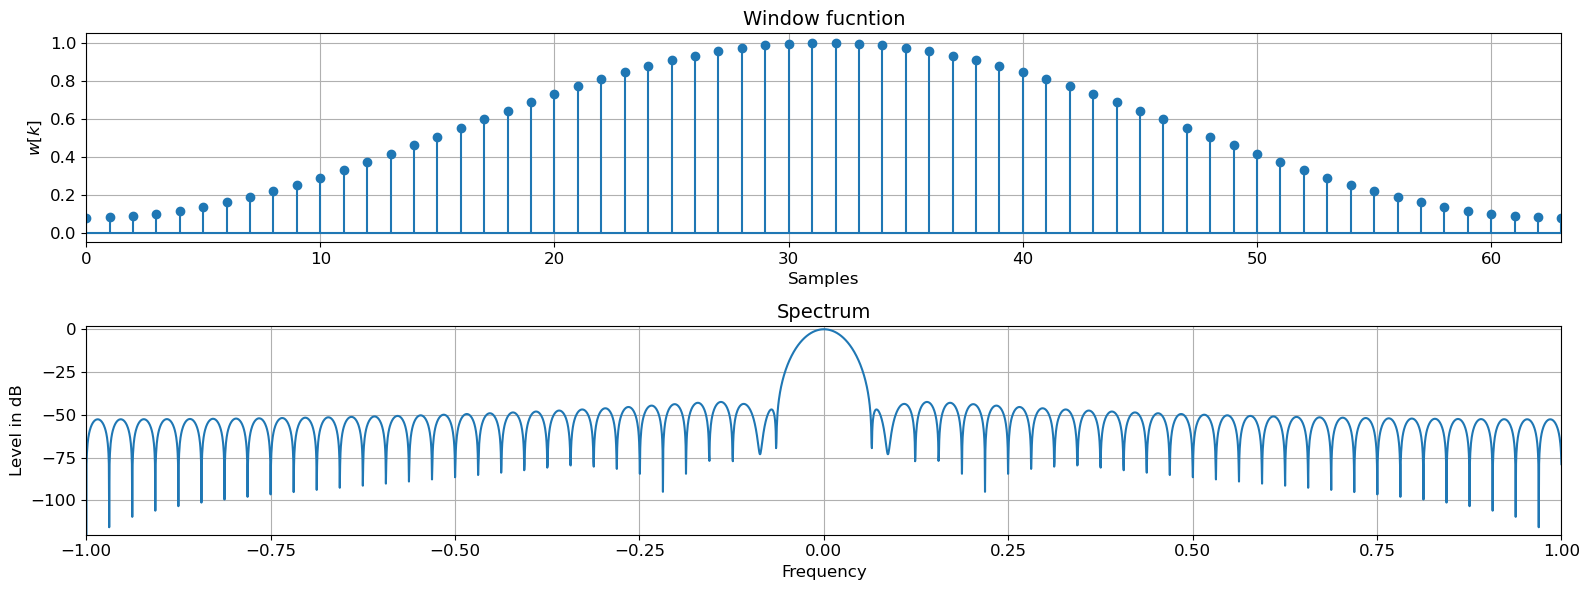

In [18]:
N = 64
dft_win(sig.hamming(N))

## Jendela Blackman

$$w(n) = a_0 - a_1 . cos(\frac{2 \pi n}{N - 1}) + a_2 . cos(\frac{4 \pi n}{N - 1})$$

dimana $a_0 = \frac{1-a}{2}; a_1 = 0.5; a_2 = 0.5 . a$

Pada $a=0.16$, maksimum tingkat sisi gelombang -58dB.

C:\Users\Arthur\AppData\Local\Temp\ipykernel_11768\3723326752.py:2: DeprecationWarning: Importing blackman from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.blackman' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.blackman(N))


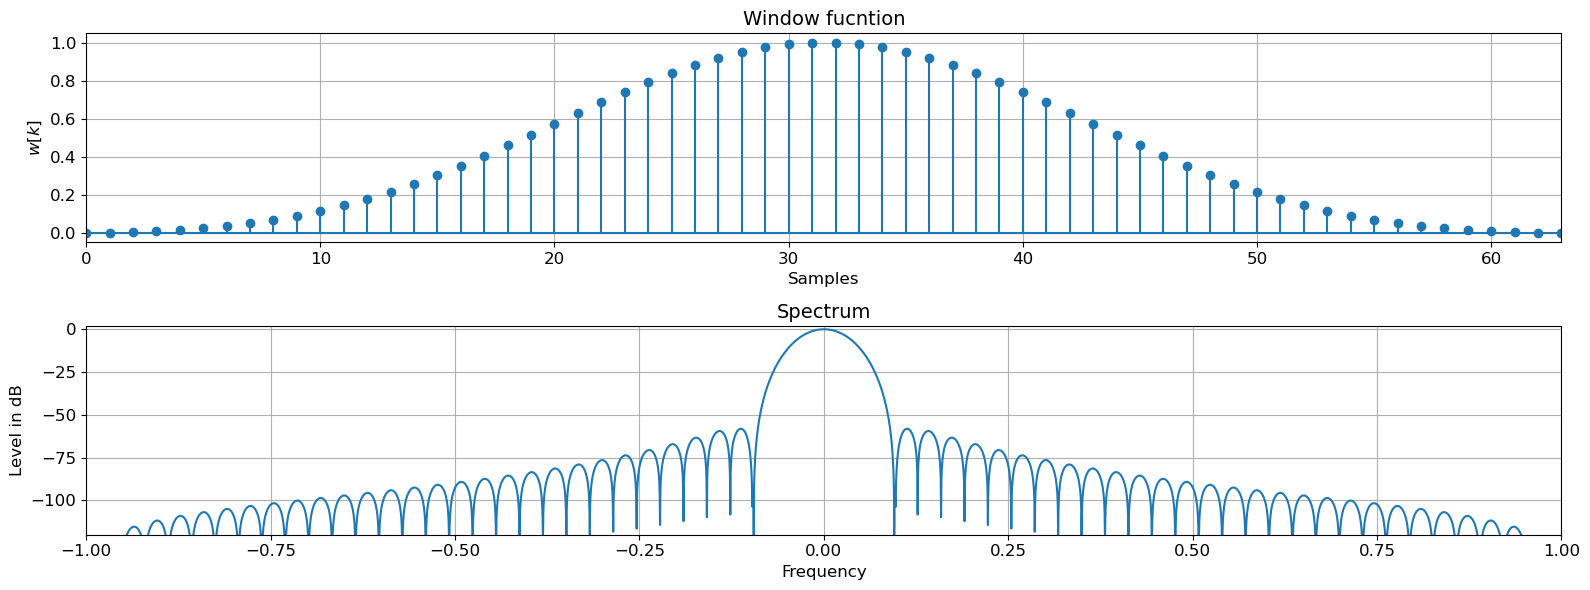

In [19]:
N = 64
dft_win(sig.blackman(N))

## Jendela Blackman-Harris
Dibentuk dengan menjumlahkan empat suku (yaitu jendela orde keempat).

$$w(n) = a_0 - a_1 . cos(\frac{2 \pi n}{N - 1}) + a_2 . cos(\frac{4 \pi n}{N - 1}) - a_3 . cos(\frac{6 \pi n}{N - 1})$$

dimana $a_0 = 0.35875, a_1 = 0.48829, a_2 = 0.14128, a_3 = 0.01168$

Maksimum level sisi gelombang: -92 dB.

C:\Users\Arthur\AppData\Local\Temp\ipykernel_11768\3966982054.py:2: DeprecationWarning: Importing blackmanharris from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.blackmanharris' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.blackmanharris(N))


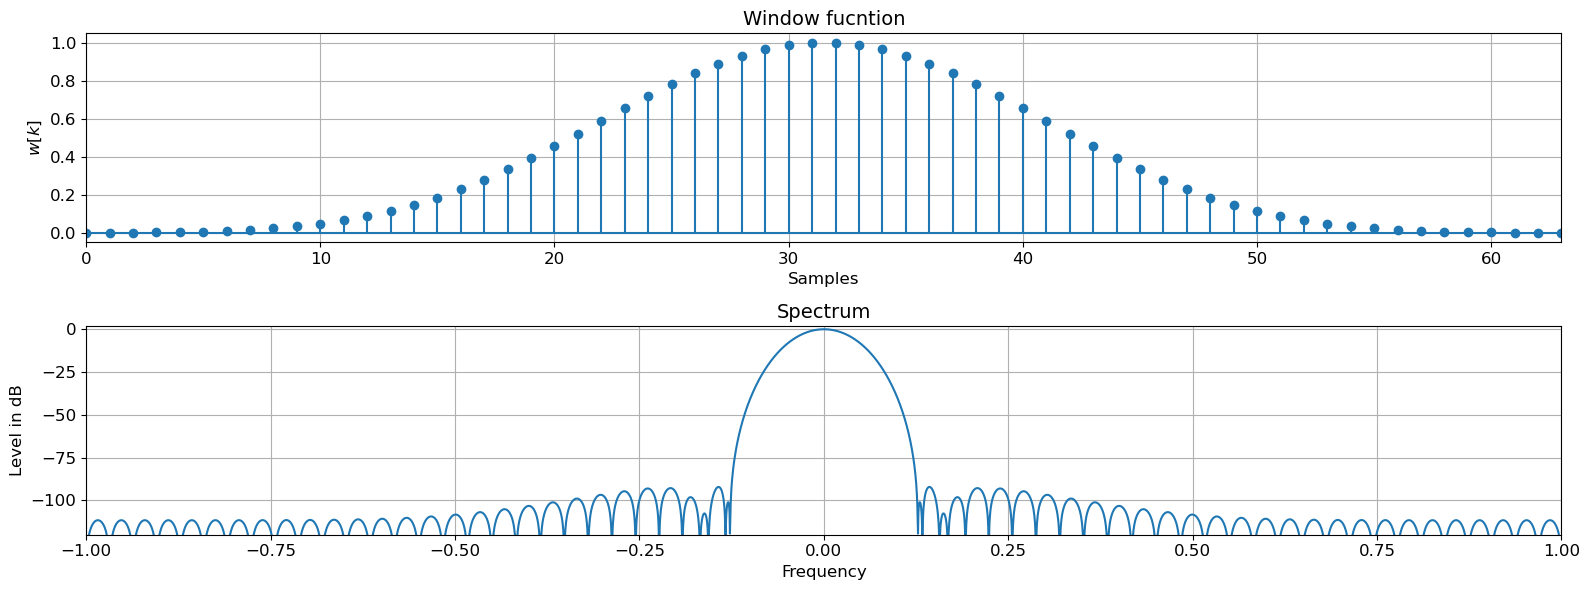

In [20]:
N = 64
dft_win(sig.blackmanharris(N))

## Jendela Blackman-Nuttall

Rumusnya mirip dengan jendela Blackman-Harris. Perbedaannya hanya dalam koefisien. Dibentuk sebagai jumlah empat suku.

$$w(n) = a_0 - a_1 . cos(\frac{2 \pi n}{N - 1}) + a_2 . cos(\frac{4 \pi n}{N - 1}) - a_3 . cos(\frac{6 \pi n}{N - 1})$$

dimana $a_0 = 0.3635819, a_1 = 0.4891775, a_2 = 0.1365995, a_3 = 0.0106411$

Tingkat maksimum gelombang samping: -93 dB.

C:\Users\Arthur\AppData\Local\Temp\ipykernel_11768\2747806284.py:2: DeprecationWarning: Importing nuttall from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.nuttall' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.nuttall(N))


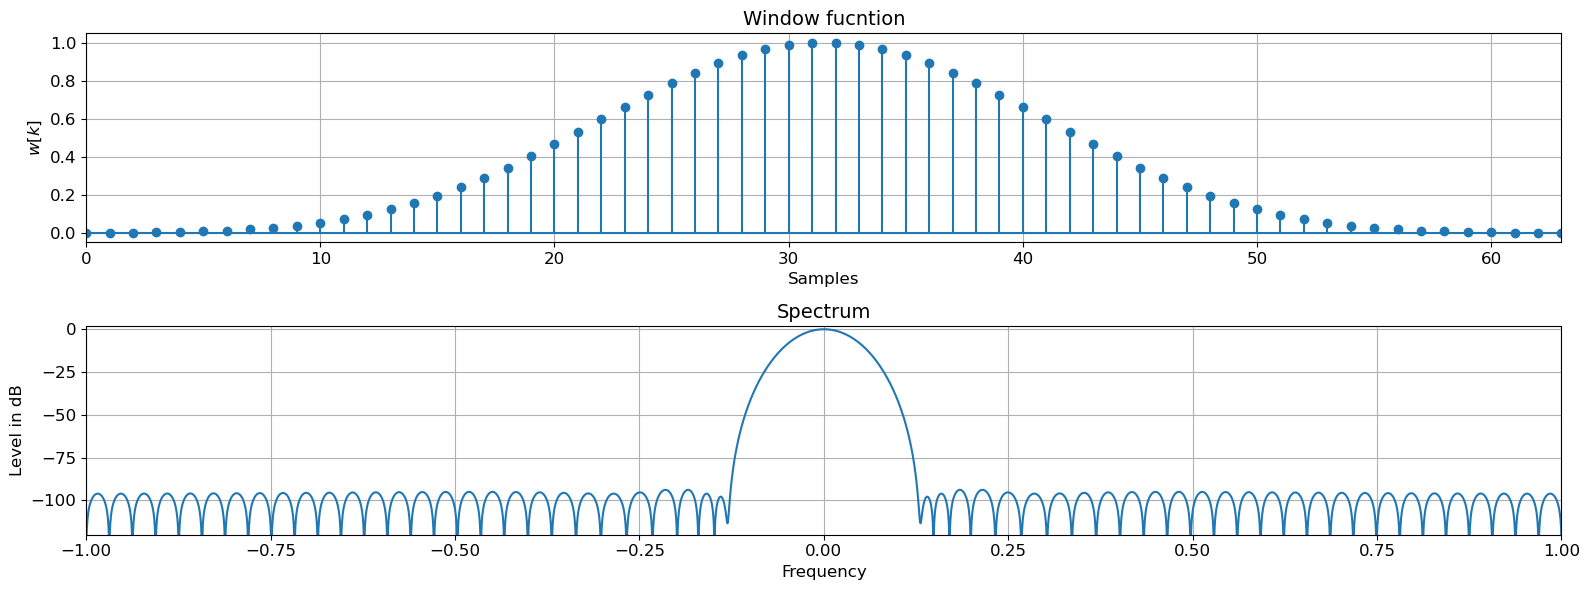

In [21]:
N = 64
dft_win(sig.nuttall(N))

## Jendela Datar Puncak (Flat-Top Window).

$$w(n) = a_0 - a_1 . cos(\frac{2 \pi n}{N - 1}) + a_2 . cos(\frac{4 \pi n}{N - 1}) - a_3 . cos(\frac{6 \pi n}{N - 1}) + a_4 . cos(\frac{8 \pi n}{N - 1})$$

dimana
- $a_0 = 0.21556895$
- $a_1 = 0.41663158$
- $a_2 = 0.27777263158$
- $a_3 = 0.083578947$
- $a_4 = 0.0069474$

Maksimum level lobe samping: -70 dB."

C:\Users\Arthur\AppData\Local\Temp\ipykernel_11768\2934491545.py:2: DeprecationWarning: Importing flattop from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.flattop' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.flattop(N))


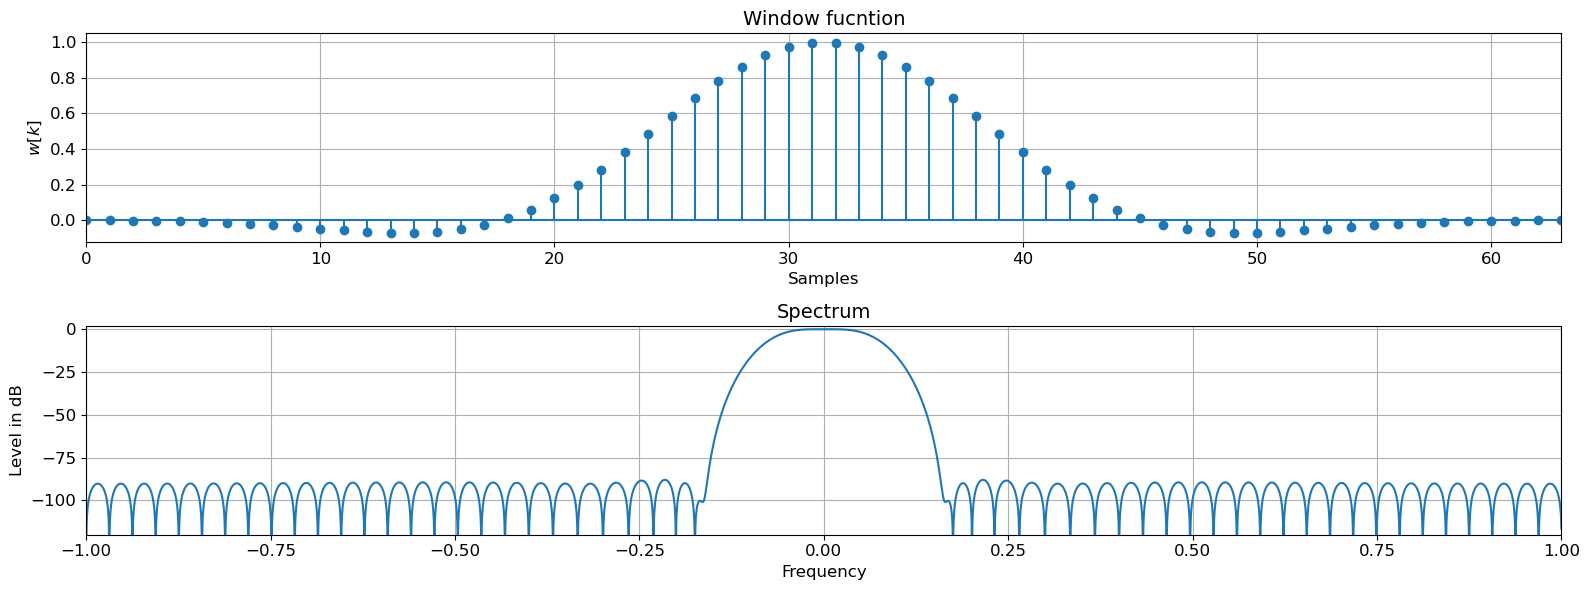

In [22]:
N = 64
dft_win(sig.flattop(N))

## Jendela Kaiser

Bervariasi dengan parameter α, yang menentukan tingkat penurunan dan kemiringan karakteristik frekuensi. Okna Kaiser adalah jenis okna serbaguna yang memungkinkan Anda memilih parameter filtrasi untuk berbagai jenis tugas.

$$w(n) = \frac{|I_0 \sqrt{1 - (\frac{2n - N + 1}{N-1})^2}|}{|I_0 (\beta)|}$$

Dimana

- $Io$ adalah modifikasi fungsi Bessel dari jenis pertama, orde nol.
- $β$ adalah koefisien yang menentukan seberapa besar energi yang terkonsentrasi di dalam main lobe (lembayung utama) dari fungsi jendela spektrum.

Semakin besar $β$, semakin besar proporsi energi di dalam lobe utama, dan semakin lebar lobe utama. Oleh karena itu, semakin rendah tingkat side-lobe (penekanan yang lebih baik dalam tugas filtrasi). Secara praktis, fungsi Kaiser hampir tidak diimplementasikan dalam bagian perangkat keras, tetapi digunakan secara perangkat lunak (perhitungan koefisien filter FIR). Dalam kasus nyata, nilai $β$ yang digunakan berkisar antara 5 hingga 11.

C:\Users\Arthur\AppData\Local\Temp\ipykernel_11768\581213881.py:2: DeprecationWarning: Importing kaiser from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.kaiser' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.kaiser(N, beta=4))


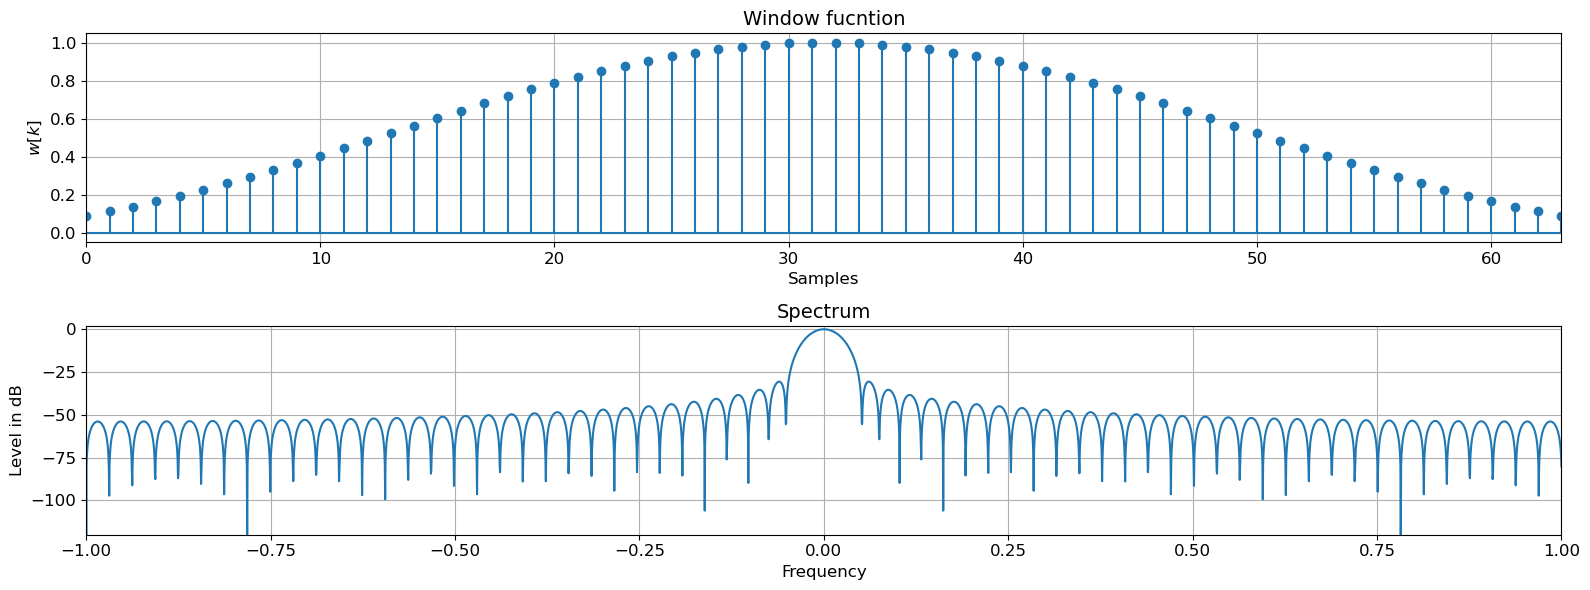

In [24]:
N = 64
dft_win(sig.kaiser(N, beta=4))

C:\Users\Arthur\AppData\Local\Temp\ipykernel_11768\4066354759.py:2: DeprecationWarning: Importing kaiser from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.kaiser' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.kaiser(N, beta=10))


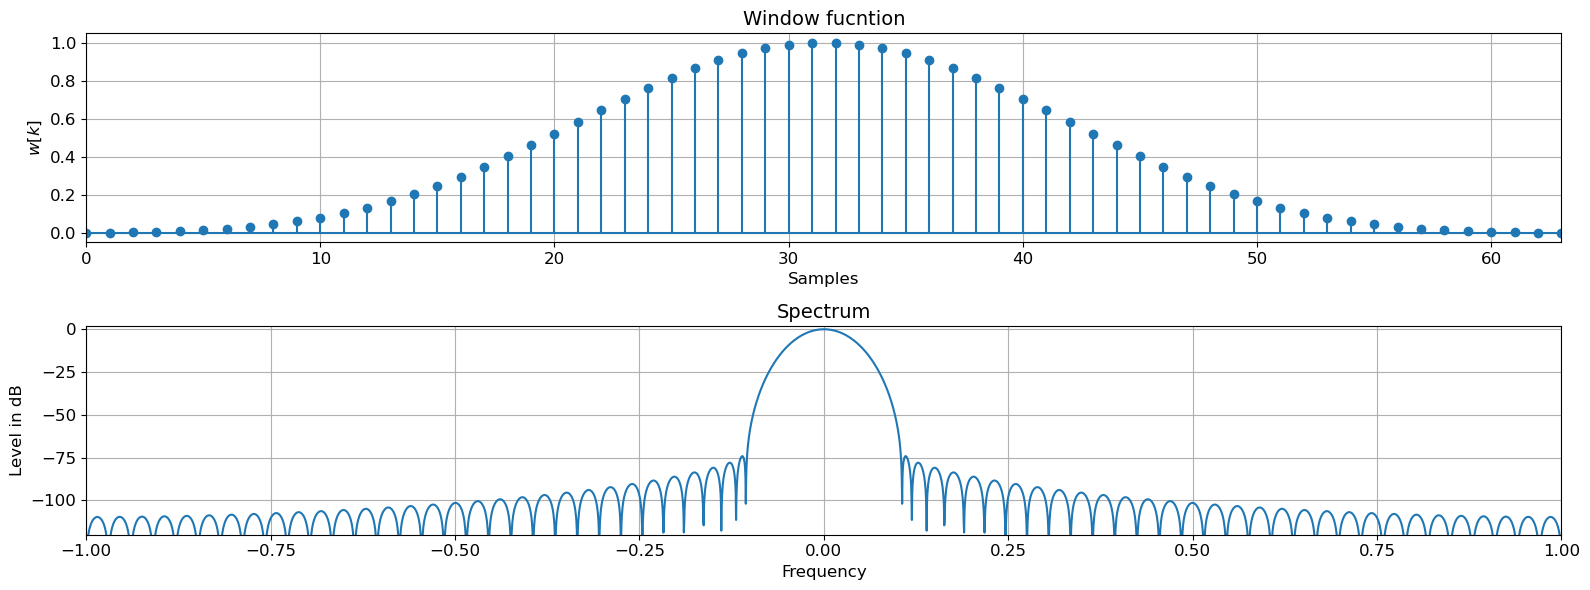

In [25]:
N = 64
dft_win(sig.kaiser(N, beta=10))

## Jendela Gaussa

Ditentukan oleh fungsi eksponensial dan variasi parameter dispersi (standar deviasi).

$$w(n) = e^{- \frac{1}{2} (\frac{n}{a})^2}$$

Sifat frekuensi jendela tergantung pada parameter $α$

Semakin besa$r$ α, semakin lebar lobe utama, tetapi semakin tinggi tingkat lob samping (penekanan buruk).

Secara praktis, jendela Gauss hampir tidak diimplementasikan dalam bagian perangkat keras, tetapi digunakan secara program, misalnya dalam perhitungan koefisien filter FIR.

C:\Users\Arthur\AppData\Local\Temp\ipykernel_11768\2058389782.py:2: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.gaussian(N, std=16))


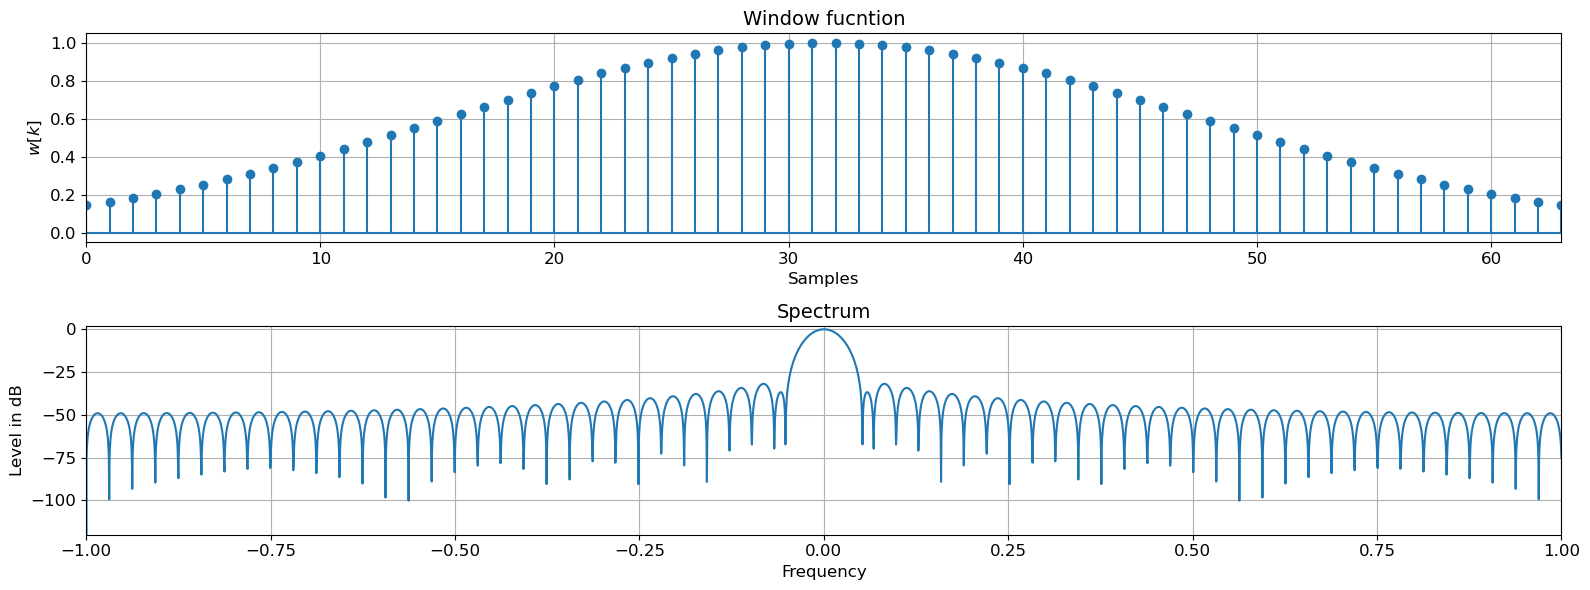

In [26]:
N = 64
dft_win(sig.gaussian(N, std=16))

C:\Users\Arthur\AppData\Local\Temp\ipykernel_11768\1968728147.py:2: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.gaussian(N, std=8))


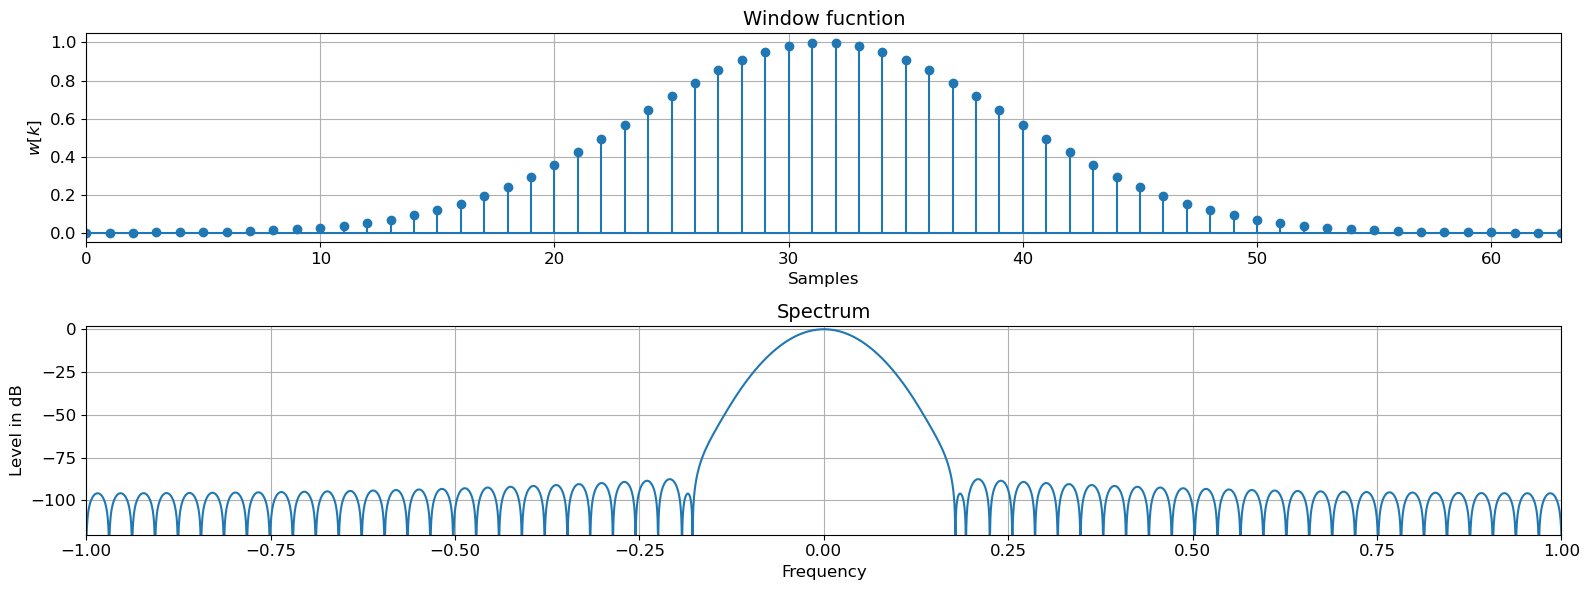

In [27]:
N = 64
dft_win(sig.gaussian(N, std=8))

Mari kita bahas fungsi jendela utama.

### Fungsi Jendela dalam numpy

Di paket numpy Python, kumpulan fungsi jendela terbatas.
- bartlett(M) - fungsi segitiga,
- blackman(M) - fungsi Blackman,
- hamming(M) - jendela Hamming,
- hanning(M) - jendela Hanning atau Hann,
- kaiser(M, beta) - jendela Kaiser.

Berbeda dengan paket numpy, paket scipy memperluas kemampuan filtrasi jendela, seperti yang terlihat dalam contoh-contoh di atas, dan menambahkan fungsionalitas. Berikut adalah daftar fungsi utama dari paket scipy.signal.

### Fungsi Jendela dalam scipy

|Fungsi|Deskripsi|Level Side-Lob|
|------|---------|--------------|
|boxcar(M, sym)|Jendela Persegi Panjang|13|
|triang(M, sym)|Jendela Segitiga|26|
|bartlett(M, sym)|Jendela Segitiga (Bartlett)|26|
|cosine(M, sym)|Jendela Kosinus|23|
|hann(M, sym)|Jendela Hann (Hanning)|31.5|
|hanning(M, sym)|Jendela Hanning (Hann)|31.5|
|hamming(M, sym)|Jendela Hamming|42|
|blackman(M, sym)|Jendela Blackman|58|
|blackmanharris(M, sym)|Fungsi Blackman-Harris|92|
|nuttall(M, sym)|Jendela Nuttall|93|
|flattop(M, sym)|Jendela dengan Puncak Datar|70|
|kaiser(M, beta, sym)|Fungsi Kaiser (parameter - $\beta$)|$f(\beta)$|
|gaussian(M, std, sym)|Fungsi Gauss (parameter - $a$)|$f(a)$|

## Fungsi Utama Jendela

C:\Users\Arthur\AppData\Local\Temp\ipykernel_11768\1581122803.py:6: DeprecationWarning: Importing triang from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.triang' or the convenience function 'scipy.signal.get_window' instead.
  ww[:,1] = sig.triang(N)
C:\Users\Arthur\AppData\Local\Temp\ipykernel_11768\1581122803.py:7: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  ww[:,2] = sig.hann(N)
C:\Users\Arthur\AppData\Local\Temp\ipykernel_11768\1581122803.py:8: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  ww[:,3] = sig.hamming(N)
C:\Users\Arthur\AppData\Local\Temp\ipykernel_11768\1581122803.py:9: Depre

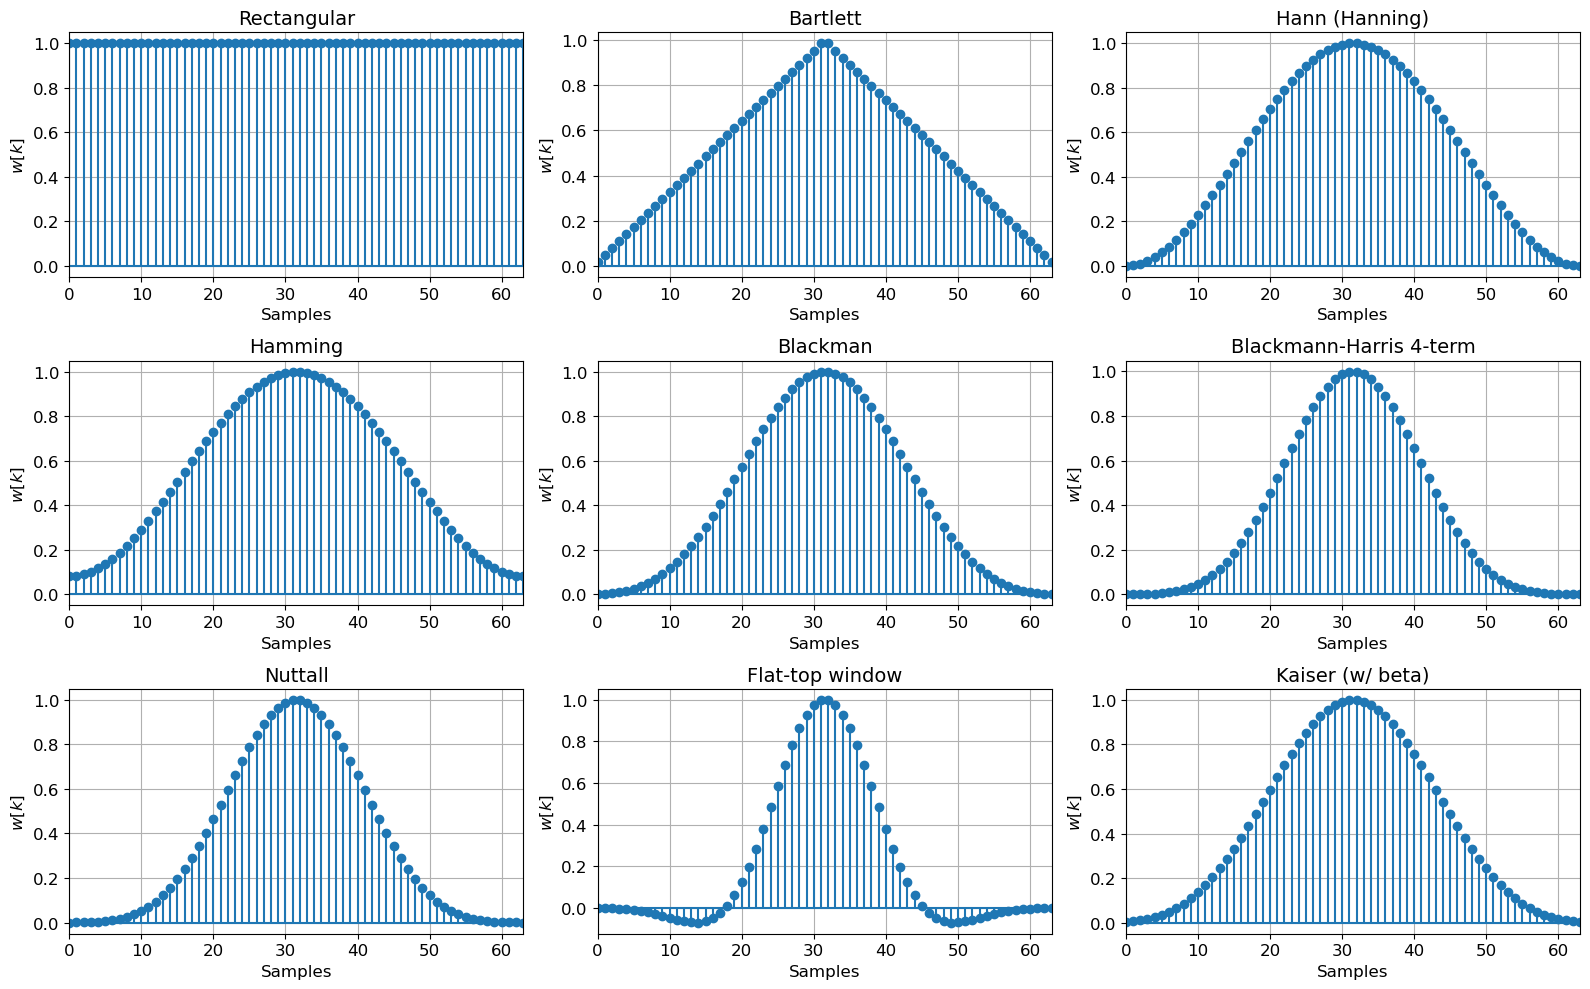

In [29]:
N = 64
# All windows
ww = np.zeros((N, 9))

ww[:,0] = np.ones(N)
ww[:,1] = sig.triang(N)
ww[:,2] = sig.hann(N)
ww[:,3] = sig.hamming(N)
ww[:,4] = sig.blackman(N)
ww[:,5] = sig.blackmanharris(N)
ww[:,6] = sig.nuttall(N)
ww[:,7] = sig.flattop(N)
ww[:,8] = sig.kaiser(N, beta=8)

lst_titles = ['Rectangular', 'Bartlett', 'Hann (Hanning)', 
              'Hamming', 'Blackman', 'Blackmann-Harris 4-term', 
              'Nuttall', 'Flat-top window', 'Kaiser (w/ beta)'
             ]

# Plot window function and its spectrum
fig = plt.figure(figsize=(16, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.stem(ww[:,i], basefmt='C0')
    plt.title(lst_titles[i])
    plt.xlabel('Samples')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
plt.tight_layout()

### Spektrum Fungsi Jendela Utama.

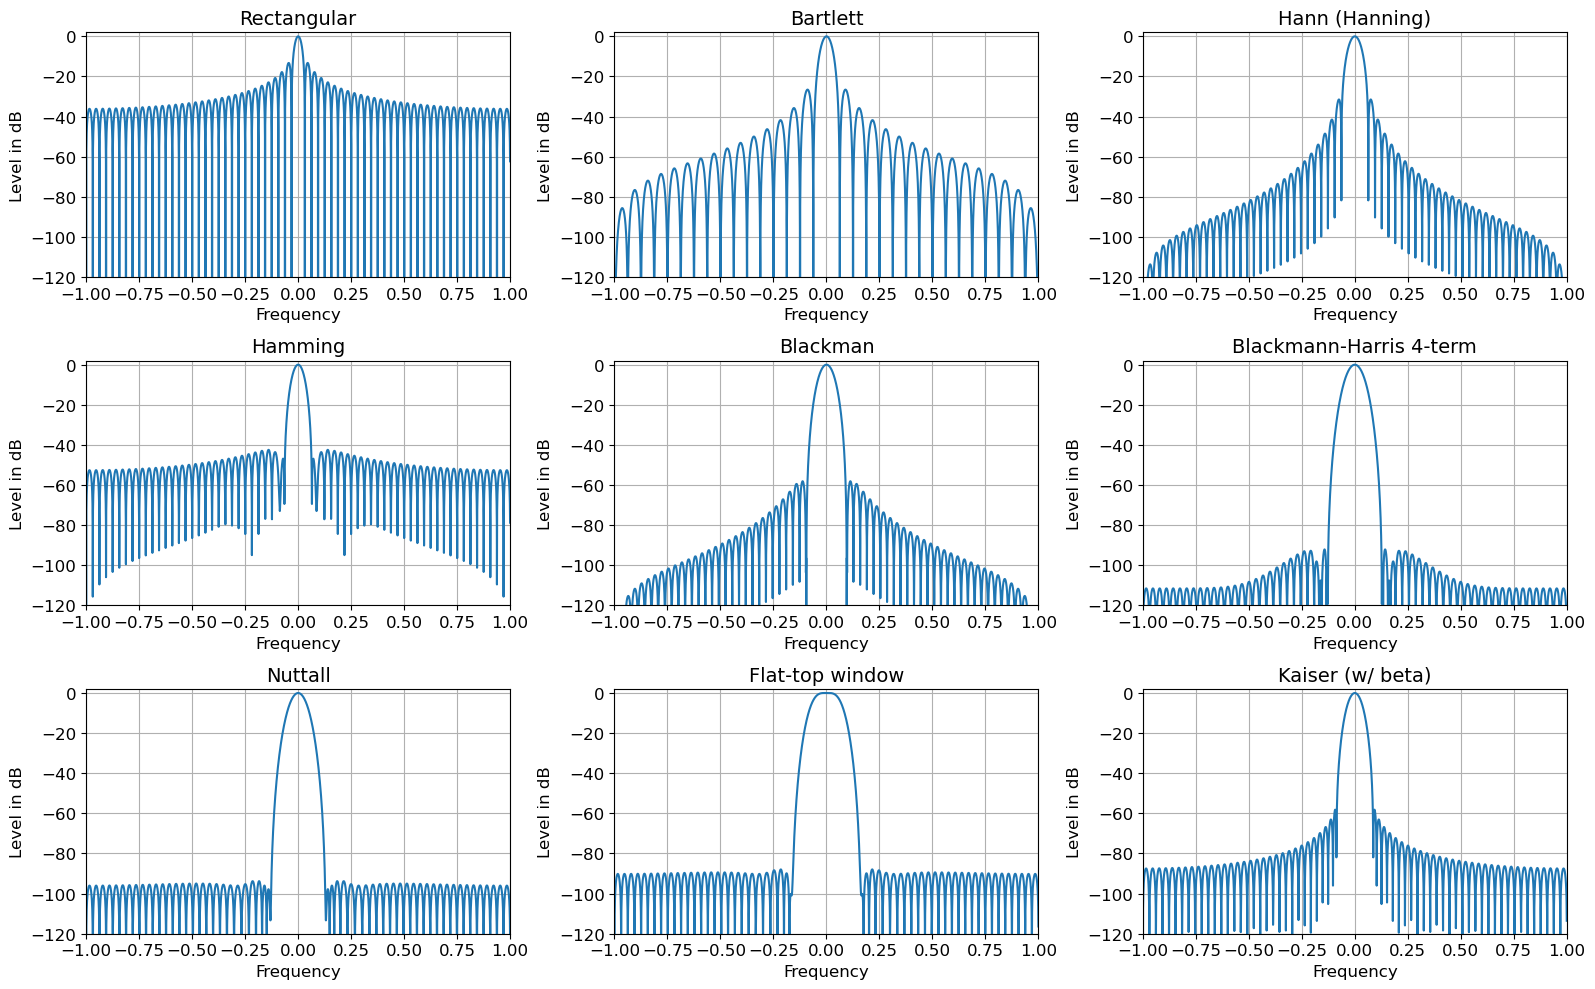

In [30]:
NFFT = 2**12
# Calculate FFT
WW = fft(ww, NFFT, axis=0)
WW = WW / np.amax(WW, axis=0) + np.nextafter(0,1)

tt = np.linspace(-1, 1, NFFT)

# Plot window function and its spectrum
fig2 = plt.figure(figsize=(16, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.plot(tt, 20*np.log10(np.abs(fftshift(WW[:,i]))))
    plt.title(lst_titles[i])
    plt.xlabel('Frequency')
    plt.ylabel('Level in dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
plt.tight_layout()

### Pencarian Sinyal Lemah.."

Sebelumnya disebutkan bahwa dengan menggunakan filtrasi jendela, kita dapat mengekstraksi sinyal-sinyal lemah di tengah-tengah sinyal yang lebih kuat. Mari kita buktikan hal ini dengan membangun grafik dari jumlah dua sinyal harmonis, yang frekuensinya berdekatan dan memiliki perbedaan amplitudo yang signifikan.

Pada grafik berikut, disajikan spektrum tanpa filtrasi jendela (jendela - persegi panjang) dan dengan filtrasi jendela masukan menggunakan jendela Kaiser dengan parameter $β$ yang ditentukan = 7.

C:\Users\Arthur\AppData\Local\Temp\ipykernel_11768\4257611099.py:10: DeprecationWarning: Importing kaiser from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.kaiser' or the convenience function 'scipy.signal.get_window' instead.
  wn = sig.kaiser(N, beta=7)


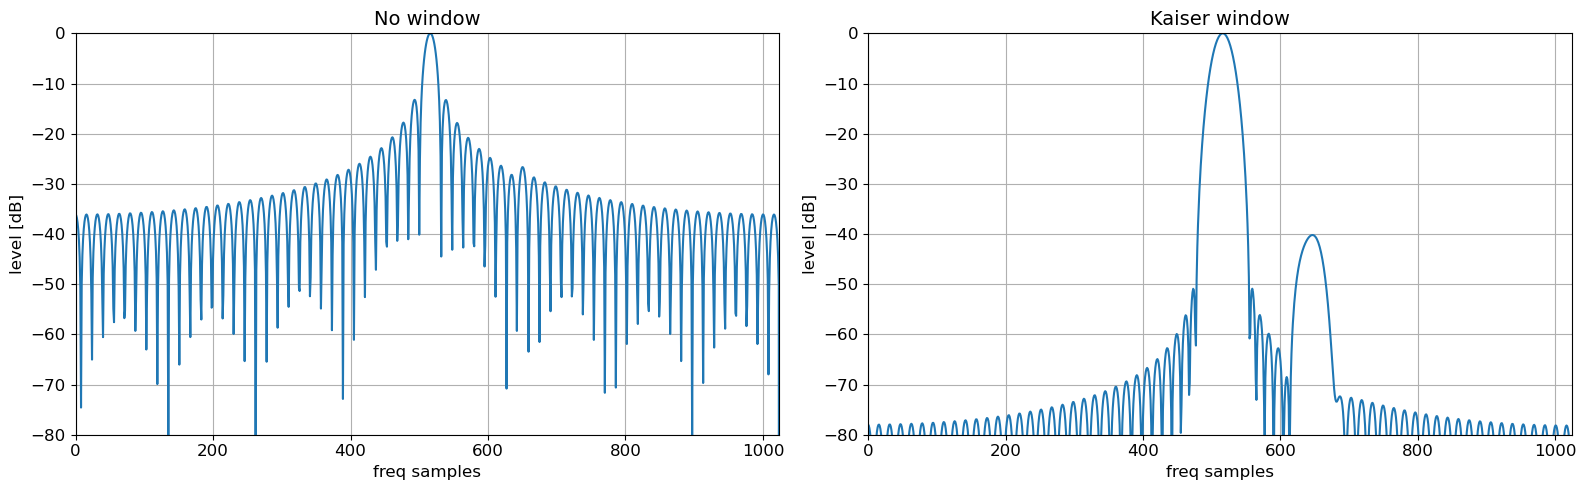

In [31]:
# Input parameters
N = 128
NFFT = 2048

# Input signal (long: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = 100*np.cos(2*np.pi*32*tt)+np.cos(2*np.pi*40*tt)

# Window (Kaiser)
wn = sig.kaiser(N, beta=7)
yy = xx*wn

# Calculate FFT 1
sft = np.abs(fft(xx, NFFT))
slg = 20*np.log10(sft / np.max(sft))

# Calculate FFT 2
yft = np.abs(fft(yy, NFFT))
ylg = 20*np.log10(yft / np.max(yft))

lst_ffts = [slg, ylg]
lst_wins = ['No window', 'Kaiser window']
plt.figure(figsize=(16, 5))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(lst_wins[i])
    plt.xlabel('freq samples')
    plt.ylabel('level [dB]')
    plt.plot(lst_ffts[i])
    plt.xlim([0, NFFT//2])
    plt.ylim([-80, 0])
    plt.grid(True)
plt.tight_layout()

Seperti yang terlihat pada gambar sebelumnya, tanpa fungsi jendela hampir tidak mungkin membedakan sinyal lemah di tengah sinyal yang kuat. Namun, dengan menerapkan fungsi jendela dengan sifat penyupresi yang baik, kita berhasil mendeteksi sinyal lemah di tengah sinyal yang kuat!